Descripción del proyecto
------------------------------


*Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.*

**Instrucciones para completar el proyecto**
- **Paso 1.** Abre el archivo de datos y estudia la información general. Ruta de archivo: /datasets/vehicles_us.csv. Descarga el conjunto de datos
  
--------------------
- **Paso 2.** Preprocesamiento de datos
**Identifica y estudia los valores ausentes:**

Cuando sea apropiado, sustituye los valores. Explica por qué has decidido hacerlo así y cómo has seleccionado los valores sustitutos.
Describe los factores que puedan haber resultado en valores ausentes.
Convierte los datos en los tipos necesarios:

**Indica las columnas donde los tipos de datos necesitan ser cambiados y explica por qué.**

--------------------
- **Paso 3.** Calcula y añade a la tabla lo siguiente:
Día de la semana, mes y año en el que el anuncio se colocó
Los años del vehículo cuando el anuncio se colocó
La media de millaje del vehículo por año
En la columna condition, reemplaza los valores de cadena con una escala numérica:

- `nuevo` = 5
- `como nuevo` = 4
- `excelente` = 3
- `bien` = 2
- `bastante` = 1
- `para rescate` = 0

--------------------
- **Paso 4.** Lleva a cabo el análisis exploratorio de datos siguiendo las siguientes instrucciones:
**Estudia los siguientes parámetros:** `precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición.` Traza histogramas para cada uno de los parámetros. `Estudia cómo los valores atípicos afectan a la forma y legitimidad de los histogramas.`
**Determina los límites superiores de los valores atípicos, elimina dichos valores y almacénalos en un DataFrame apartado, y continúa tu trabajo con los datos filtrados.**
Utiliza los datos filtrados para plantear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Obtén conclusiones de cada histograma.
Estudia cuántos días los anuncios fueron mostrados (days_listed). Traza un histograma. Calcula la media y la mediana. Describe la vida útil habitual de un anuncio. Determina cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
**Analiza el número de anuncios y el precio medio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.**
***¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), traza gráficos de caja y bigotes, y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.***

--------------------
- **Paso 5.** Escribe una conclusión general
**Formato:** Completa la tarea en un Jupyter notebook. Escribe tu código en las celdas de código y tus explicaciones en las celdas markdown, después aplica los formatos y encabezados.

**Descripción de los datos**
El conjunto de datos contiene los siguientes datos:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

--------------------
**¿Cómo será evaluado mi proyecto?**
Hemos recopilado los criterios de evaluación del proyecto. Léelos cuidadosamente antes de empezar a resolver tu caso.

Esto es lo que buscan los revisores de proyecto cuando evalúan tu proyecto:

- Cómo explicas los problemas identificados en los datos
- Qué métodos utilizaste para procesar valores ausentes
- Cómo utilizas segmentos de datos
- Si tus gráficos resuelven o no tareas específicas
- Qué métodos utilizas para trazar gráficos
- Si has automatizado o no el trazado de gráficos
- Si calculas las cifras de correlación de los datos y cómo las explicas
- Si sigues la estructura del proyecto y mantienes el código ordenado
**Tus conclusiones**
- Si dejas comentarios en cada paso
- Las hojas informativas y resúmenes de las lecciones anteriores tienen todo lo que necesitas para completar el proyecto.

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import statistics

In [2]:
documento = os.path.join('..','DataFrames','vehicles_us.csv')

## Paso 1.
Abre el archivo de datos y estudia la información general

In [3]:
#Cargar el documento
df=pd.read_csv(documento)


In [4]:

display(df.head(3))
display(df.info())
display(df.describe().map(lambda x: f'{x:,.2f}'))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,"51,525.00","47,906.00","46,265.00","43,633.00","25,572.00","51,525.00"
mean,"12,132.46","2,009.75",6.13,"115,553.46",1.00,39.55
std,"10,040.80",6.28,1.66,"65,094.61",0.00,28.20
min,1.00,"1,908.00",3.00,0.00,1.00,0.00
25%,"5,000.00","2,006.00",4.00,"70,000.00",1.00,19.00
50%,"9,000.00","2,011.00",6.00,"113,000.00",1.00,33.00
75%,"16,839.00","2,014.00",8.00,"155,000.00",1.00,53.00
max,"375,000.00","2,019.00",12.00,"990,000.00",1.00,271.00


## Paso 2.

**Preprocesamiento de datos Identifica y estudia los valores ausentes:**

- Cuando sea apropiado, sustituye los valores. Explica por qué has decidido hacerlo así y cómo has seleccionado los valores sustitutos. Describe los factores que puedan haber resultado en valores ausentes. Convierte los datos en los tipos necesarios:

- Indica las columnas donde los tipos de datos necesitan ser cambiados y explica por qué.

In [5]:
#Tratar los datos Nulos
print(f'DATOS NULOS:\n{df.isna().sum()}')
columnas_tofix=['model_year','cylinders','odometer','paint_color','is_4wd']
for i in columnas_tofix:
    print(f'{i}:{df[i].unique()}')
    
    

DATOS NULOS:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64
model_year:[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]
cylinders:[ 6.  4.  8. nan  5. 10.  3. 12.]
odometer:[145000.  88705. 110000. ... 121778. 181500. 139573.]
paint_color:[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']
is_4wd:[ 1. nan]


In [6]:
#TRATAR A model_year
df['model_year']=df['model_year'].fillna(int(df['model_year'].mean()))#RELLENARE LOS DATOS NULOS POR LA MEDIA(ENTERO) DEL MODEL YEAR

In [7]:
#TRATAR A cylinders
df['cylinders']=df['cylinders'].fillna(4)#RELLENARE LOS DATO NULOS POR EL VALOR 4, EL CUAL CONSIDERO QUE 4 CILINDROS ES LO NORMAL EN VEHICULOS.

In [8]:
#TRATAR A odometer
df['odometer']=df['odometer'].fillna(int(df['odometer'].mean()))#RELLENARE LOS DATOS NULOS POR LA MEDIA(ENTERO) DE LOS KILOMETRAJES

In [9]:
#TRATAR A paint_color
df['paint_color']=df['paint_color'].fillna('unknow')#RELLENARE LOS DATOS NULOS CON EL VALOR unknown, para definir que es desconocido.

In [10]:
#TRATAR A is_4wd
df['is_4wd']=df['is_4wd'].fillna(0)#RELLENARE LOS DATOS NULOS POR 0 PARA DEFINIR QUE NO SON DE TRACCION 4 RUEDAS.

In [11]:
#COMPRAR QUE LOS DATOS NULOS HAN DESAPARECIDO
print(f'DATOS NULOS:\n{df.isna().sum()}')

DATOS NULOS:
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


## Paso 3. 

**Calcula y añade a la tabla lo siguiente:**


Día de la semana, mes y año en el que el anuncio se colocó
Los años del vehículo cuando el anuncio se colocó
La media de millaje del vehículo por año
En la columna condition, reemplaza los valores de cadena con una escala numérica:

- `nuevo` = 5
- `como nuevo` = 4
- `excelente` = 3
- `bien` = 2
- `bastante` = 1
- `para rescate` = 0

In [12]:
print(f'COLUMNAS:\n{df.columns.tolist()}')

COLUMNAS:
['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd', 'date_posted', 'days_listed']


**Día de la semana, mes y año en el que el anuncio se colocó Los años del vehículo cuando el anuncio se colocó**

In [13]:
df['date_posted']=pd.to_datetime(df['date_posted'])#Convertimos las fechas posteadas a un formato de fecha

In [14]:
df['day_posted']=df['date_posted'].dt.day_name()#HAGO UNA NUEVA COLUMNA CON EL DIA POSTEADO EN NOMBRE EJEMPLO Monday,Wednesday,..Sunday

In [15]:
df['month_posted']=df['date_posted'].dt.month_name()#HAGO UNA NUEVA COLUMNA CON EL MES POSTEADO EN NOMBRE EJEMPLO January,Febraury,..December

In [16]:
df['year_posted']=df['date_posted'].dt.year#HAGO UNA NUEVA COLUMNA CON EL YEAR POSTEADO EJEMPLO 2000,1998,ETC.

In [17]:
#PARA CALCULAR LA EDAD DEL VEHICULO DESDE QUE SALIO HASTA QUE FUE POSTEADO ES YEAR_POSTED-MODEL_YEAR
df['vehicle_age']=df['year_posted']-df['model_year']#HAGO UNA NUEVA COLUMNA PARA CALCULAR LA EDAD DEL VEHICULO DESDE QUE SALIO HASTA QUE SE PUBLICO.

In [18]:
display(df.sample()) #PARA VISUALIZAR EL EJEMPLO DE LOS DATOS CONVERTIDOS

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age
32560,8420,2009.0,ford fusion,excellent,4.0,gas,81000.0,automatic,sedan,silver,0.0,2018-07-02,20,Monday,July,2018,9.0


**La media de millaje del vehículo por año En la columna condition, reemplaza los valores de cadena con una escala numérica:**

In [19]:
#PARA CALCULAR LA MEDIA DE MILLAJE POR YEAR SOLO DIVIDE ODOMETER/VEHICLE_aGE
#df.drop('column_name',axis=1,inplace=True) #Para eliminar columnas en caso de requerirlo
df['mileage_per_year']=np.where(df['vehicle_age'] > 0, df['odometer']/df['vehicle_age'],0)
#LE DIGO QUE SI EL ANIO DEL VEHICULO ES MAYOR A 0 HAGA LA DIVISION SI NO SOLO COLOQUE 0


In [20]:
#PARA APLICAR UN ID A LA CONDITION DEL VEHICLE
condition_id={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0 
}
df['condition']=df['condition'].map(condition_id)

In [21]:
display(df.sample()) #PARA VISUALIZAR EL EJEMPLO DE LOS DATOS CONVERTIDOS

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,mileage_per_year
47693,5495,2010.0,nissan rogue,2,4.0,gas,113469.0,automatic,SUV,black,1.0,2018-11-01,25,Thursday,November,2018,8.0,14183.625


## **Paso 4.** 

**Lleva a cabo el análisis exploratorio de datos siguiendo las siguientes instrucciones:**


**Estudia los siguientes parámetros:** 

- `precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición.` Traza histogramas para cada uno de los parámetros. `Estudia cómo los valores atípicos afectan a la forma y legitimidad de los histogramas.`
**Determina los límites superiores de los valores atípicos, elimina dichos valores y almacénalos en un DataFrame apartado, y continúa tu trabajo con los datos filtrados.**
Utiliza los datos filtrados para plantear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Obtén conclusiones de cada histograma.
Estudia cuántos días los anuncios fueron mostrados (days_listed). Traza un histograma. Calcula la media y la mediana. Describe la vida útil habitual de un anuncio. Determina cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.
**Analiza el número de anuncios y el precio medio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.**
***¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), traza gráficos de caja y bigotes, y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.***

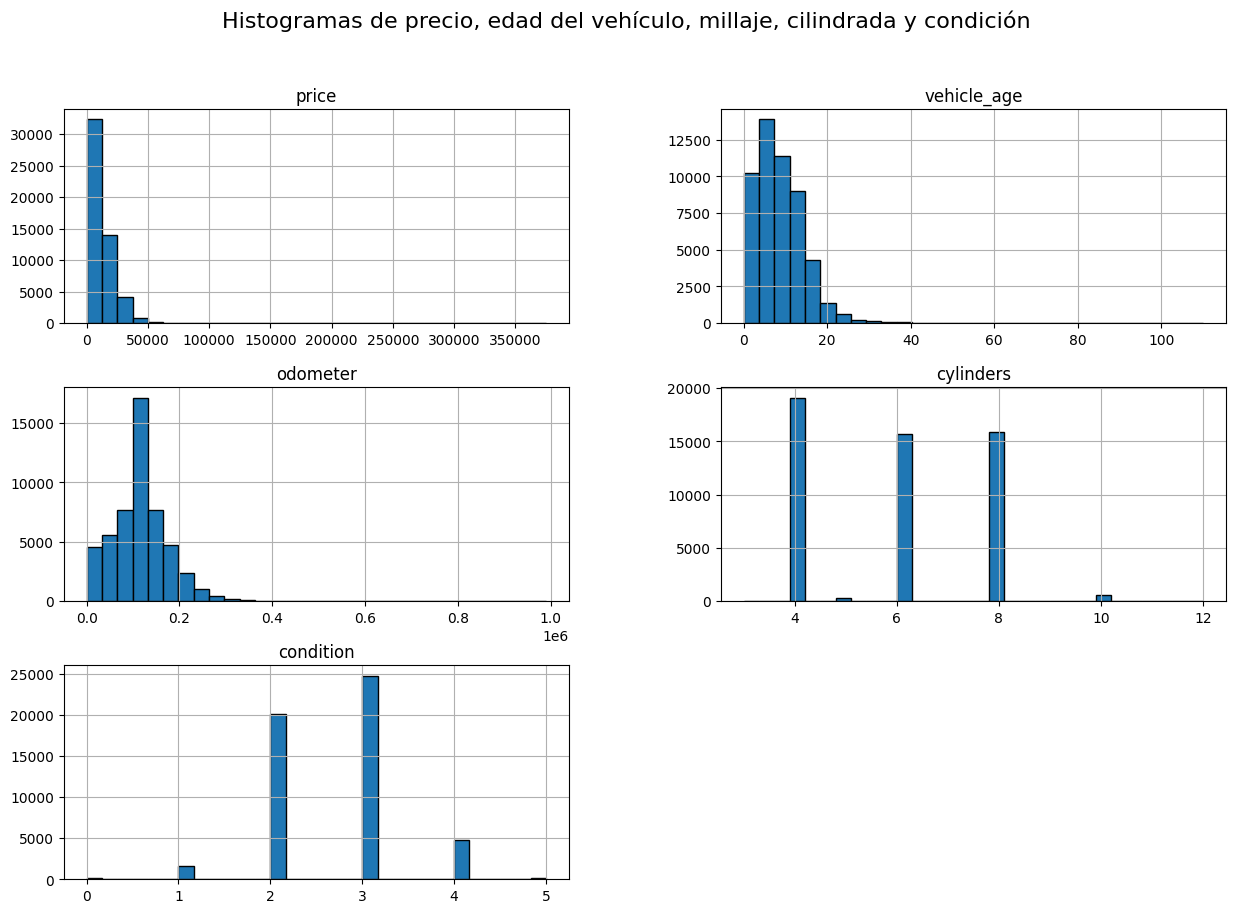

In [22]:
#HISTOGRAMAS A ESTUDIAR:

columns_to_plot = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']

#HAGO UN HISTOGRAMA PARA CADA COLUMNA QUE QUIERO REFLEJAR EN UN HISTOGRAMA

df[columns_to_plot].hist(bins=30, figsize=(15, 10), edgecolor='black') #colocar axes= a esta linea si deseas aplicar los valores en cada barra, sin embargo no queda bien
"""
for ax in axes.flatten():
    for p in ax.patches:
        if p.get_height() >0:
            ax.annotate(f'{p.get_height():,.2f}',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
"""
plt.suptitle('Histogramas de precio, edad del vehículo, millaje, cilindrada y condición', size=16)
plt.ylabel('Frecuencia')
plt.show()

In [23]:
#ENCONTRAR VALORES ATIPICOS:
#FUNCION PARA AUTOMATIZARLO
def valores_atipicos(df, column_name):
    print(f'Datos de: {column_name.title()}')
    Q1 = df[column_name].quantile(0.25)  # Cuartil 1
    print(f'Q1: {Q1}')
    Q3 = df[column_name].quantile(0.75)  # Cuartil 3
    print(f'Q3: {Q3}')
    IQR = Q3 - Q1  # Rango intercuartílico
    print(f'IQR: {IQR}')
    #COMO NINGUNO DE LOS DATOS REFLEJA DATOS EN NEGATIVO PONDRE QUE EL MINIMO SEA 0 SI EL LIMITE INFERIOR OBTENIDO ES MENOR A TAL
    limite_inf = max(Q1 - 1.5 * IQR,0)  # Límite inferior
    print(f'Limite Inferior: {limite_inf}')
    limite_sup = Q3 + 1.5 * IQR  # Límite superior
    print(f'Limite Superior: {limite_sup}')
    return df[(df[column_name] < limite_inf) | (df[column_name] > limite_sup)]  # Dataframe con valores atípicos


In [24]:
atipico_price=valores_atipicos(df,'price')



Datos de: Price
Q1: 5000.0
Q3: 16839.0
IQR: 11839.0
Limite Inferior: 0
Limite Superior: 34597.5


In [25]:
atipico_vehicle_age=valores_atipicos(df,'vehicle_age')

Datos de: Vehicle_Age
Q1: 4.0
Q3: 12.0
IQR: 8.0
Limite Inferior: 0
Limite Superior: 24.0


In [26]:
atipico_odometer=valores_atipicos(df,'odometer')


Datos de: Odometer
Q1: 79181.0
Q3: 146541.0
IQR: 67360.0
Limite Inferior: 0
Limite Superior: 247581.0


In [27]:
atipico_cylinders=valores_atipicos(df,'cylinders')

Datos de: Cylinders
Q1: 4.0
Q3: 8.0
IQR: 4.0
Limite Inferior: 0
Limite Superior: 14.0


In [28]:
df_atipico=pd.concat([atipico_price,atipico_vehicle_age,atipico_odometer,atipico_cylinders]).drop_duplicates()

In [29]:
display(df_atipico.sample(5))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,mileage_per_year
8206,47995,2018.0,ford f-250 sd,2,8.0,diesel,7073.0,automatic,truck,silver,1.0,2018-07-08,32,Sunday,July,2018,0.0,0.000000
46916,14500,1979.0,ford f-150,3,8.0,gas,118000.0,manual,pickup,orange,0.0,2018-10-03,48,Wednesday,October,2018,39.0,3025.641026
20557,42999,2015.0,ford f250,3,8.0,diesel,61910.0,automatic,pickup,black,1.0,2018-09-19,38,Wednesday,September,2018,3.0,20636.666667
24968,45990,2018.0,ford f350,3,4.0,diesel,43457.0,automatic,truck,white,1.0,2018-05-20,3,Sunday,May,2018,0.0,0.000000
34954,64990,1962.0,chevrolet corvette,3,8.0,gas,75274.0,manual,convertible,unknow,0.0,2019-01-02,25,Wednesday,January,2019,57.0,1320.596491


In [30]:
#eliminar valores atipicos
df_sin_atipico=df.drop(df_atipico.index)

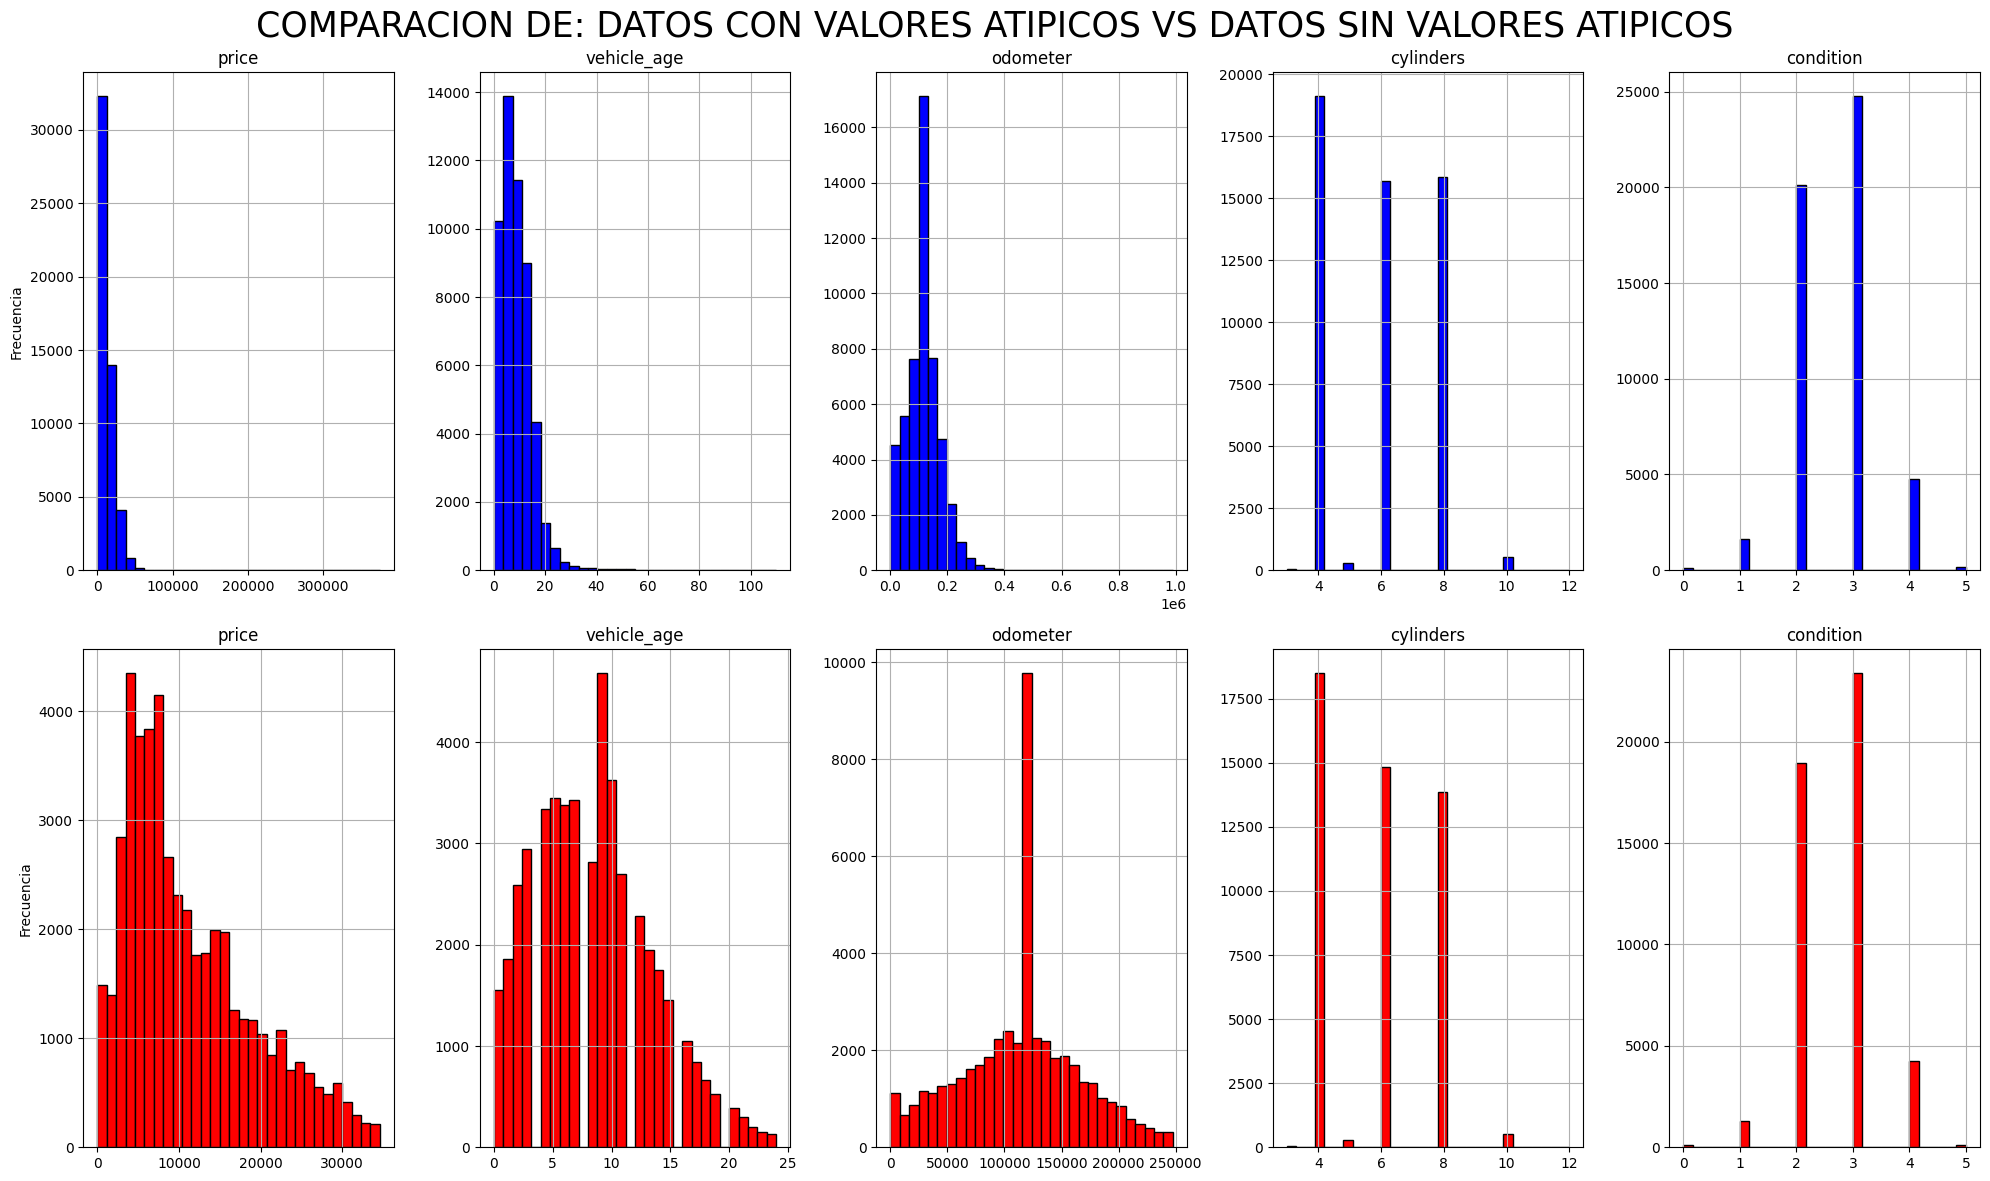

In [31]:
#COMPARAREMOS EL DF CON VALORES ATIPICOS Y EL DF SIN VALORES ATIPICOS
#PRIMERO HAGO UNA DIVISION DE LAS GRAFICAS PARA COMPARARLAS
fig,axs=plt.subplots(nrows=2, ncols=len(columns_to_plot), figsize=(20,12))
#CREAMOS LOS HISTOGRAMAS CON VALORES ATIPICOS INCLUIDOS
df[columns_to_plot].hist(bins=30,ax=axs[0],color='blue',edgecolor='black')

axs[0,0].set_ylabel('Frecuencia')
#CREAMOS LOS HISTROGRAMOS SIN VALORES ATIPICOS INCLUIDOS
df_sin_atipico[columns_to_plot].hist(bins=30,ax=axs[1],color='red',edgecolor='black')
axs[1,0].set_ylabel('Frecuencia')
#AGREGAMOS EL TITULO DEL ENCABEZADO
plt.suptitle('COMPARACION DE: DATOS CON VALORES ATIPICOS VS DATOS SIN VALORES ATIPICOS',size=25)
plt.tight_layout()##EVITA QUE LOS ELEMENTOS SE SUPERPONGAN
#MOSTRAMOS LOS GRAFICOS
plt.show()

## OBSERVACIONES

- Puedo ver que los histogramas son mas legibles.
- Se interpretan de mejor manera.
- Puedo deducir mas cosas.
- En algunos no afecto, pero en las columnas price, vehicle age y odometer se nota un gran contraste.

**Observaciones principales:**


1.-`Precio` (price):

- Con valores atípicos (arriba): Hay una gran concentración de valores en el rango bajo (entre 0 y 100,000), pero también hay una cola larga hacia precios muy altos (hasta 300,000), lo que indica la presencia de valores extremadamente elevados (outliers).
- Sin valores atípicos (abajo): La distribución es más controlada, con una mayor concentración de precios entre 0 y 30,000. Los valores extremadamente altos han sido eliminados, lo que facilita una mejor visualización del rango típico de precios.

2- `Edad del vehículo` (vehicle_age):

- Con valores atípicos: Hay algunos vehículos que muestran edades extremadamente altas (más de 80 años), lo que probablemente sean valores atípicos.
- Sin valores atípicos: La distribución está más enfocada en edades entre 0 y 20 años, lo que parece ser un rango más razonable para la mayoría de los vehículos.

3.- `Kilometraje` (odometer):

- Con valores atípicos: Se observa una distribución sesgada hacia la izquierda, con algunos vehículos que tienen más de 1,000,000 de kilómetros, lo que probablemente son valores atípicos.
- Sin valores atípicos: El rango de kilometraje se reduce considerablemente, centrado entre 0 y 250,000, lo cual es más representativo del kilometraje de vehículos en condiciones normales.

4.- `Cilindros` (cylinders):

- Con valores atípicos: La distribución incluye vehículos con una cantidad de cilindros que llega hasta 12, lo que podría ser un valor atípico dependiendo del contexto.
- Sin valores atípicos: Se eliminan las configuraciones de cilindros extremadamente altas, mostrando más claramente la distribución común entre 4, 6, y 8 cilindros, que son los valores más habituales.

5.- `Condición` (condition):

- Con valores atípicos: La distribución muestra una mayor dispersión de valores, incluyendo vehículos en condiciones extremas (muy malas o muy buenas).
- Sin valores atípicos: La mayoría de los vehículos se concentran en las categorías de condición intermedia (2, 3 y 4), lo que indica que los datos atípicos han sido eliminados y se enfoca en las condiciones más típicas.

**Estudia cuántos días los anuncios fueron mostrados (days_listed). Traza un histograma. Calcula la media y la mediana. Describe la vida útil habitual de un anuncio. Determina cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo. Analiza el número de anuncios y el precio medio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios. ¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), traza gráficos de caja y bigotes, y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.**

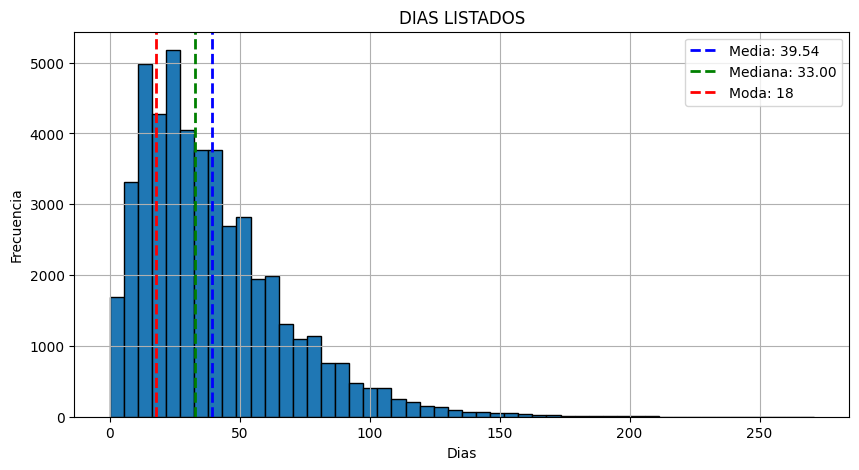

Modas: ['[18] Unimodal']
Media:39.54
Mediana:33.00


In [32]:
media_day_list=df_sin_atipico['days_listed'].mean()
mediana_day_list=df_sin_atipico['days_listed'].median()

#SACAR LA MODA CONSIDERANDO CASOS BIMODALES, O MULTIMODALES
moda_day_list=stats.mode(df['days_listed'],keepdims=False)
frecuencia_moda=moda_day_list.count#Con esto extrae el conteo de la frecuencia maxima

#GRAFICO
df_sin_atipico['days_listed'].hist(bins=50,figsize=(10,5),edgecolor='black')
plt.axvline(media_day_list, color='blue', linestyle='dashed', linewidth=2, label=f'Media: {media_day_list:.2f}')
plt.axvline(mediana_day_list, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_day_list:.2f}')
plt.axvline(18, color='red', linestyle='dashed', linewidth=2, label='Moda: 18')
plt.legend()
plt.title('DIAS LISTADOS')
plt.ylabel('Frecuencia')
plt.xlabel('Dias')
plt.show()



#aqui lo que hago es decirle que en valores coloque los valores unicos de df['days_listed'] y en conteo coloque sus conteos.
valores, conteo= np.unique(df['days_listed'], return_counts=True) 
#aqui lo que hago es decirle que me regrese todos los valores en forma de lista que su conteo sea igual a frecuencia_moda el conteo maximo.
modas= valores[conteo==frecuencia_moda]#con esto considero casos de unimodalidad, bimodalidad, multimodalidad


print(f'Modas: {list(map(lambda x:f'{modas} Unimodal' if len(modas) == 1 else (f'{modas} Bimodal' if len(modas) == 2 else f'{modas} Multimodal'),modas ))}')


print(f'Media:{media_day_list:.2f}\nMediana:{mediana_day_list:.2f}')

## OBSERVACIONES:


**Distribución de los días listados:**

- El histograma tiene una distribución sesgada a la derecha (positivamente asimétrica), con una gran concentración de vehículos listados por menos de 50 días, y luego una caída en la frecuencia conforme aumentan los días.
- Hay algunos valores que se extienden hasta más de 200 días, pero son mucho menos frecuentes.

**Estadísticas:**

- Moda: Es de 18 días, lo que indica que este es el valor que más frecuentemente aparece en los datos.
- Clasificada como unimodal: solo hay un valor modal en este conjunto de datos.
- Media: El valor promedio de días listados es 39.54 días.
- Mediana: El valor central (mediana) es de 33 días, lo que sugiere que la mitad de los vehículos han estado listados por menos de 33 días.


**Comparación entre media y mediana:**
-La media (39.54) es ligeramente mayor que la mediana (33.00), lo que es típico en distribuciones asimétricas a la derecha. Esto sucede porque los valores más altos (outliers) tienden a "arrastrar" la media hacia arriba, mientras que la mediana se mantiene más representativa de la mayoría de los datos.


**Posibles interpretaciones:**
- La mayoría de los vehículos no suelen estar listados por más de 50 días, pero hay algunos que se mantienen listados durante periodos mucho más largos.
- Es probable que existan algunos outliers de vehículos que están listados por más de 150 días, lo que contribuye a la cola en el gráfico y a la diferencia entre la media y la mediana.




**Análisis de anuncios por tipo de vehículo y su relación con el precio:**

Vamos a analizar el número de anuncios y el precio promedio para cada tipo de vehículo, y luego trazaremos un gráfico para mostrar la dependencia.

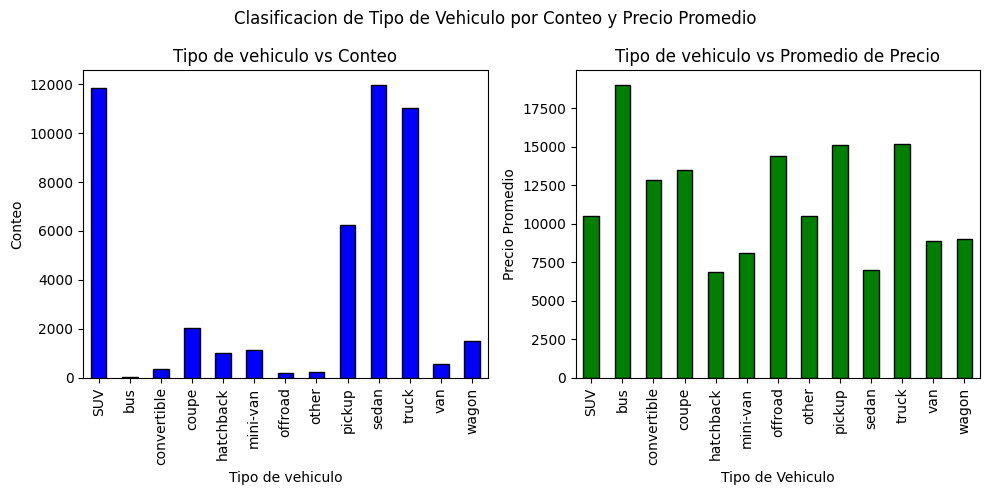

Los Vehiculos que mas se presentan son:


,count,mean
type,,
sedan,11966,6996.041284
SUV,11834,10491.031604


Los Vehiculos que menos se presentan son:


,count,mean
type,,
bus,20,19013.25000
offroad,181,14410.59116


In [33]:
clasificacion_vehiculo=df_sin_atipico.groupby('type')['price'].agg(['count','mean'])
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(10,5))
#GRAFICO 1 POR CONTEO
clasificacion_vehiculo['count'].plot(kind='bar',ax=axes[0],edgecolor='black', color='blue')
axes[0].set_title('Tipo de vehiculo vs Conteo')
axes[0].set_ylabel('Conteo')
axes[0].set_xlabel('Tipo de vehiculo')
#GRAFICO 2 POR PROMEDIO DE PRECIO
clasificacion_vehiculo['mean'].plot(kind='bar', color='green',edgecolor='black',ax=axes[1])
axes[1].set_title('Tipo de vehiculo vs Promedio de Precio')
axes[1].set_ylabel('Precio Promedio')
axes[1].set_xlabel('Tipo de Vehiculo')

plt.suptitle('Clasificacion de Tipo de Vehiculo por Conteo y Precio Promedio')
plt.tight_layout()
plt.show()

#CALCULAR LOS 2 VEHICULOS MAS CONTADOS:
top_2_vehiculos_tipo=clasificacion_vehiculo.nlargest(2,'count')
print(f'Los Vehiculos que mas se presentan son:')
display(top_2_vehiculos_tipo)

#CALCULAR LOS 2 VEHICULOS MENOS CONTADOS:
less_2_vehiculos_tipo=clasificacion_vehiculo.nsmallest(2,'count')
print(f'Los Vehiculos que menos se presentan son:')
display(less_2_vehiculos_tipo)


## OBSERVACIONES:

**Gráfico 1 (izquierda):**


- Título: "Tipo de vehículo vs Conteo".
- Este gráfico muestra la cantidad total de anuncios por cada tipo de vehículo.
- Observación principal: Los SUVs son el tipo de vehículo con el mayor número de anuncios, seguidos por los sedanes y pickups. Otros tipos de vehículos como minivans, coupes, y convertibles tienen menos anuncios en comparación.


**Gráfico 2 (derecha):**
- Título: "Tipo de vehículo vs Promedio de Precio".
- Este gráfico muestra el precio promedio de los vehículos por tipo.
- Observación principal: Los buses parecen tener el precio promedio más alto, seguido de los pickups, camionetas (truck), y convertibles. En cambio, los vehículos como SUVs, sedanes, y vans tienen precios promedio más bajos en comparación.


**Comparación entre ambos gráficos:**
- El gráfico de la izquierda revela que, aunque los SUVs tienen el mayor número de anuncios, su precio promedio no es el más alto, quedando por debajo de otros tipos de vehículos como los buses, pickups y camionetas (trucks).
- Los sedanes también tienen una gran cantidad de anuncios, pero su precio promedio es bastante más bajo comparado con los trucks y pickups.


**Tabla inferior:**
- Muestra las dos clases de vehículos con más anuncios: sedán y SUV.
- Precio promedio del sedán: ~6,996.
- Precio promedio del SUV: ~10,491.

**Posibles análisis:**
- Podrías analizar qué factores influyen en la diferencia de precios promedio entre los diferentes tipos de vehículos. Por ejemplo, el tamaño, la popularidad, o el uso típico de vehículos como pickups o camionetas podrían explicar sus precios más altos.
- También podrías explorar si existen otros factores como la condición del vehículo o el kilometraje que afecten el precio promedio de estos vehículos, además de su tipo.

**Análisis de factores que impactan el precio para los tipos más populares:**


Para los dos tipos de vehículos más populares, vamos a estudiar si el precio depende de la edad, millaje, condición, tipo de transmisión y color.

## 

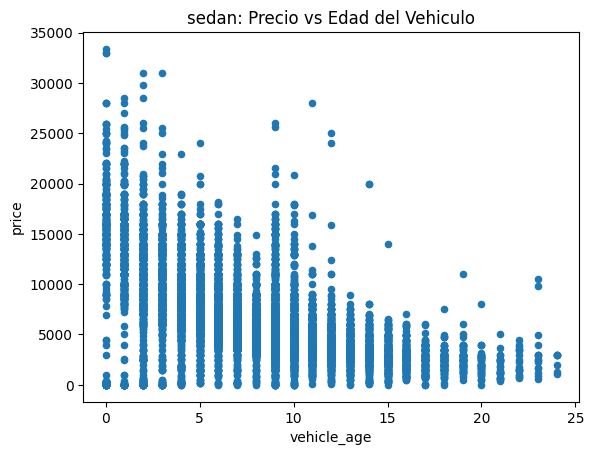

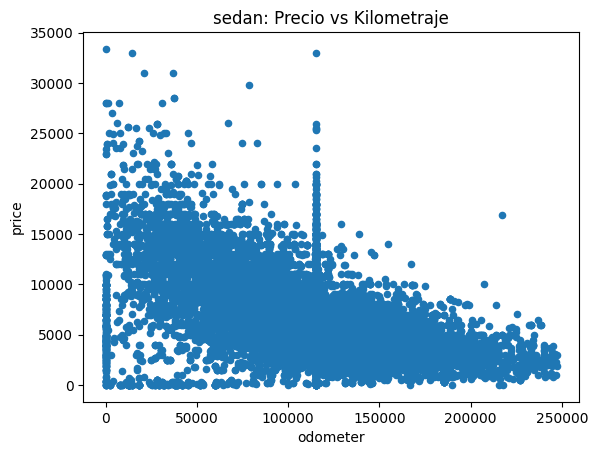

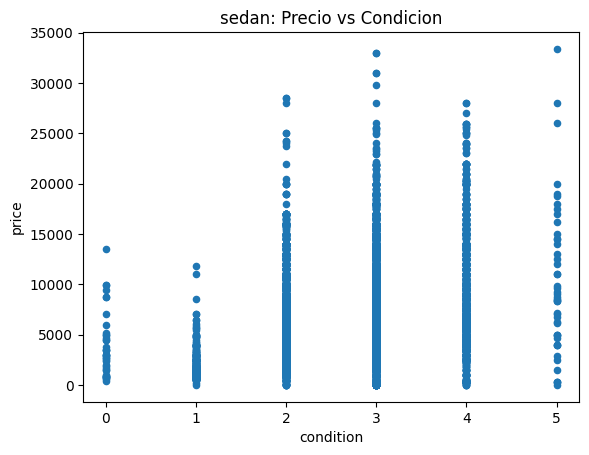

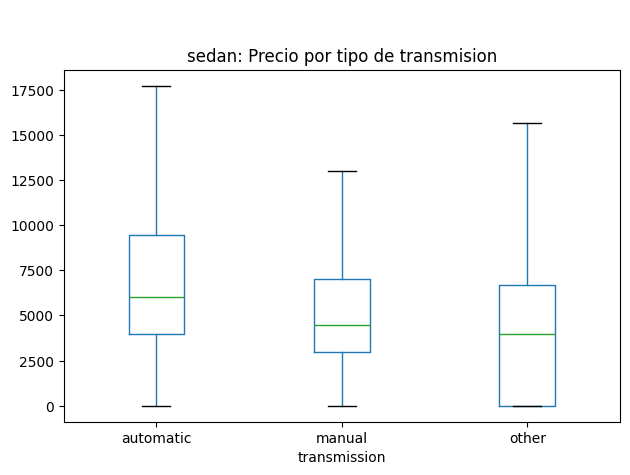

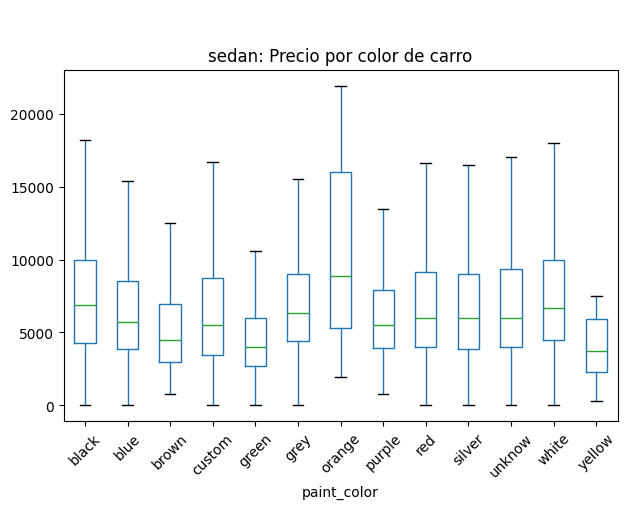

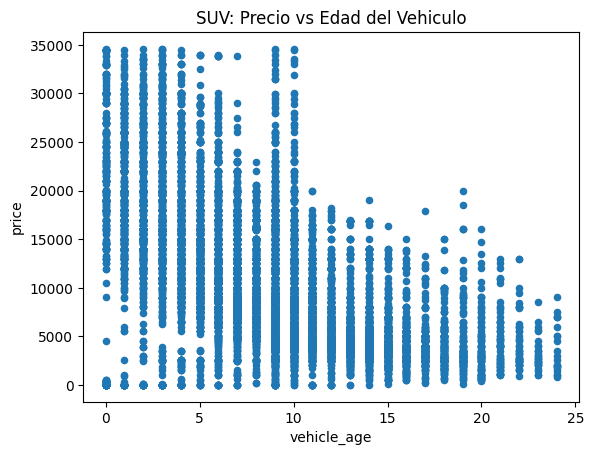

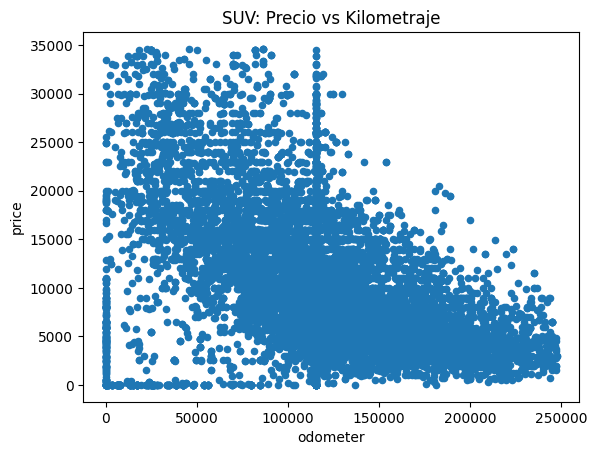

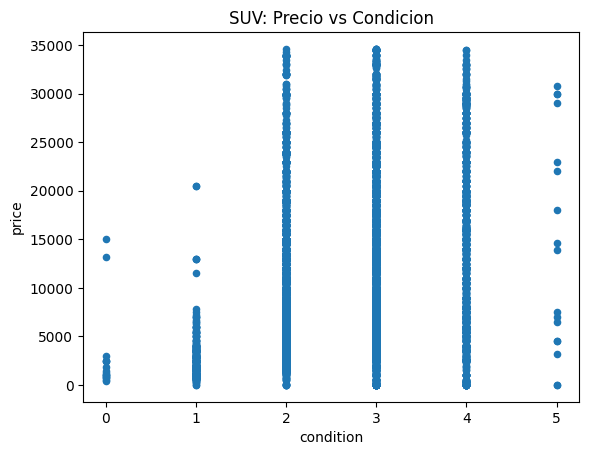

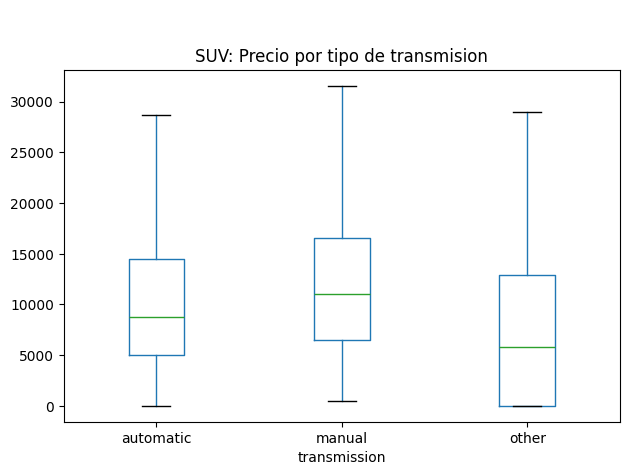

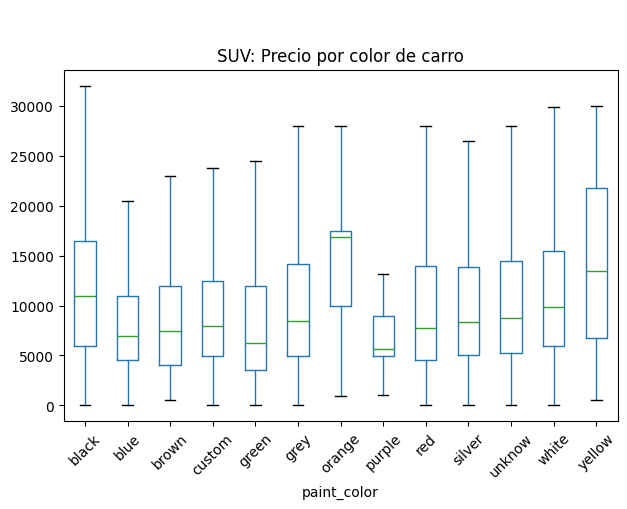

In [34]:
for vehicle_type in top_2_vehiculos_tipo.index:
    df_vehicle_type=df_sin_atipico[df_sin_atipico['type']==vehicle_type]

    df_vehicle_type.plot.scatter(x='vehicle_age',y='price',title=f'{vehicle_type}: Precio vs Edad del Vehiculo')
    plt.show()
    df_vehicle_type.plot.scatter(x='odometer',y='price',title=f'{vehicle_type}: Precio vs Kilometraje')
    plt.show()
    df_vehicle_type.plot.scatter(x='condition',y='price',title=f'{vehicle_type}: Precio vs Condicion')
    plt.show()

    df_vehicle_type.boxplot(column='price', by='transmission',grid=False, showfliers=False)
    plt.title(f'{vehicle_type}: Precio por tipo de transmision')
    plt.suptitle(' ')
    plt.tight_layout()
    plt.show()

    df_vehicle_type.boxplot(column='price', by='paint_color',grid=False, showfliers=False)
    plt.title(f'{vehicle_type}: Precio por color de carro')
    plt.suptitle(' ')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

## OBSERVACIONES:

**1. Gráficos de Sedán:**


**Precio vs Edad del Vehículo (vehicle_age):**

- Muestra una clara relación decreciente: a medida que la edad del vehículo aumenta, el precio tiende a disminuir. Los vehículos más nuevos tienden a tener precios más altos, mientras que los vehículos más viejos tienen precios más bajos.

**Precio vs Kilometraje (odometer):**

- Existe una tendencia inversa entre el kilometraje y el precio: los vehículos con menor kilometraje tienden a tener precios más altos, mientras que -los vehículos con más kilometraje tienden a tener precios más bajos.

**Precio vs Condición (condition):**
- La condición del vehículo parece tener un fuerte impacto en el precio. Los vehículos en mejor condición (condiciones 4 y 5) tienen precios más altos, mientras que los vehículos en peor condición (condiciones 0, 1, y 2) tienen precios más bajos.


**Precio por tipo de transmisión:**
- Los vehículos automáticos tienen un precio promedio mayor que los vehículos manuales. El tipo de transmisión "other" tiene precios variables pero generalmente más bajos que los automáticos.

**Precio por color de carro:**
- No parece haber una relación muy clara entre el color del vehículo y el precio. Sin embargo, algunos colores como orange y white muestran rangos de precios más amplios.

**2. Gráficos de SUV:**
**Precio vs Edad del Vehículo (vehicle_age):**
- Similar al gráfico de los sedanes, los SUVs también muestran una relación decreciente: a medida que la edad del vehículo aumenta, el precio tiende a bajar.


**Precio vs Kilometraje (odometer):**
- El precio de los SUVs también disminuye conforme el kilometraje aumenta, similar a los sedanes. Los SUVs con bajo kilometraje tienden a tener precios más altos.

**Precio vs Condición (condition):**
- Se observa que la condición también es un factor relevante en el precio de los SUVs. Los SUVs en mejor condición (3 y 4) tienen precios significativamente más altos que aquellos en peores condiciones.


**Precio por tipo de transmisión:**
- Los SUVs automáticos tienen un precio promedio más alto que los SUVs manuales. La transmisión other muestra precios ligeramente más bajos en promedio.

**Precio por color de carro:**
- Al igual que con los sedanes, no parece haber una relación muy fuerte entre el color y el precio de los SUVs, aunque ciertos colores como orange y grey tienen precios más altos que otros.


**Observaciones Generales:**
- **Edad y Kilometraje:** Tanto para sedanes como SUVs, la edad y el kilometraje tienen una fuerte correlación negativa con el precio. Esto es esperado, ya que los vehículos más antiguos o con mayor kilometraje suelen depreciarse más.
- **Condición:** La condición es un factor muy influyente en el precio, lo que sugiere que los compradores están dispuestos a pagar más por vehículos que están en mejores condiciones.
- **Transmisión:** Los vehículos con transmisión automática tienden a tener precios más altos que los de transmisión manual o other.
- **Color:** Aunque el color parece tener una relación menos fuerte con el precio, ciertos colores como orange o white muestran rangos más amplios de precios.


**Sugerencias:**
- Podrías calcular la correlación entre variables numéricas como kilometraje y edad con el precio para cuantificar estas relaciones.
- Podrías explorar si estas tendencias son consistentes en otros tipos de vehículos (además de sedanes y SUVs).
- Si te interesa predecir el precio, podrías considerar crear un modelo de regresión utilizando las variables más influyentes como edad, kilometraje, y condición.